In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## 1. Sum of a series

In [ ]:
def sum_practise1(n):
    S=0
    for i in range(1,n+1):
        S+=10./(i**3)
    return S

print(sum_practise1(1000000))
%timeit(sum_practise1(1000000))

In [ ]:
def sum_practise1b(n):
    S=0
    i=1
    while (i<n+1):
        S+=10./(i**3)
        i+=1
    return S

print(sum_practise1b(1000000))
%timeit(sum_practise1b(1000000))

In [ ]:
def sum_practise1c(n):
    iarray=np.arange(1,n+1)
    return np.add.reduce(10./iarray**3)

print(sum_practise1c(1000000))
%timeit(sum_practise1c(1000000))

## 2. Matrix Product

In [ ]:
def mat_prod_practise1(A,B):
    C=np.zeros((np.shape(A)[0],np.shape(B)[1]))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(B)[1]):
            for k in range(np.shape(A)[1]):
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
    return C

def mat_prod_practise2(A,B):
    C=np.zeros((np.shape(A)[0],np.shape(B)[1]))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(B)[1]):
            C[i,j]=np.add.reduce(A[i,:]*B[:,j])
    return C

def mat_prod_practise3(A,B):
    C=np.sum(A[:,np.newaxis,:]*B.T[np.newaxis,:,:],axis=-1)
    return C 

In [ ]:
np.random.seed(0)
A=np.random.randint(9,size=(20,21))
B=np.random.randint(9,size=(21,30))
%timeit(np.dot(A,B))
%timeit(mat_prod_practise1(A,B))
%timeit(mat_prod_practise2(A,B))
%timeit(mat_prod_practise3(A,B))

## 3. Integral 

In [42]:
def func_f(x):
    return 7*x**5+x**3+1

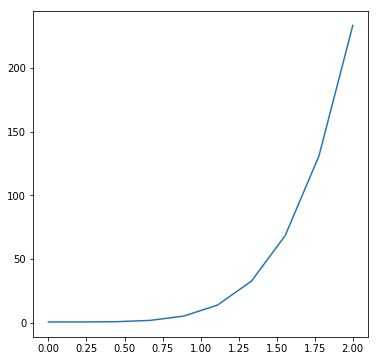

In [43]:
x=np.linspace(0,2,10)
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(x,func_f(x))


In [44]:
a=0
b=2
n=10
deltax=(b-a)/(n)
x=np.linspace(a,b,n+1)
y=func_f(x)
for i in range(n):
    print(i)
    s=s+deltax/2*(y[i]+y[i+1])
print(s)

0
1
2
3
4
5
6
7
8
9
83.0696


In [53]:
def trapeze_home(a,b,n,func):
    deltax=(b-a)/(n)
    x=np.linspace(a,b,n+1)
    y=func(x)
    I=y[0]
    for i in range(1,n):
        I=I+2*y[i]
    I=I+y[n]
    I=I*deltax/2
    return I

In [54]:
trapeze_home(a,b,n,func_f)

82.569600000000023

In [55]:
np.trapz(y,x)

82.569599999999994

In [55]:
def trapez(a,b,n,func):
    #func(*args, **kwargs)
    x=np.linspace(a,b,n)
    print(np.size(x))
    valinteg=0
    dx1=np.unique(np.round(np.diff(x),5))
    #dx2=np.float((b-a)/n)
    for ix in range(np.size(x)):
        if ((ix==0) | (ix==np.size(x)-1)):
            valinteg+=+dx1/2*func(x[ix])
        else:
            valinteg+=dx1/2*2*(func(x[ix]))
    return valinteg

def trapezb(a,b,n,func):
    x=np.linspace(a,b,n)
    y=func(x)
    s=0
    return np.sum(0.5*(y[:-1]+y[1:])*np.diff(x))  

In [56]:
print(trapez(0,2,9,func_f))
print(trapezb(0,2,10,func_f))
x=np.linspace(0,2,n)
print(np.trapz(func_f(x),x))

9
[ 83.63671875]
83.0148859422
83.0148859422


In [10]:
x=np.linspace(0,2,11)
y=func_f(x)
print(x)
print(y)
np.trapz(y,x)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]
[   1.         1.01024    1.13568    1.76032    3.80576    9.        20.14624
   41.39168   78.49632  139.10176  233.     ]


82.569599999999994

## 4. Taylor develoment of a cosine

In [2]:
# Factoriel function
def fact_home_1(n):
    s=1
    for i in range(1,n+1):
        s*=i
    return s

In [3]:
def fact_home_2(n):
    if n==0:
        return 1
    else:
        return np.prod(np.arange(1,n+1))

In [4]:
# (-1)**(p)* x**(2*p)/fac(2*p)
p=4
x=np.pi/3
s=0
for p in range(2):
    s+=(-1)**p * x**(2*p)/fact_home_1(2*p)

print(s)


0.45168864438392464


In [16]:
x=np.pi/3
epsilon=1e-12
s=0
p=0
error=10
while(error>epsilon):
    s+=(-1)**p * x**(2*p)/fact_home_1(2*p)
    p+=1
    print(p)
    error=x**(2*p)/fact_home_1(2*p)
    print(error)
    

print(s)


1
0.5483113556160754
2
0.05010755711625637
3
0.001831636171268297
4
3.586810400226993e-05
5
4.370419717525111e-07
6
3.6308344847385137e-09
7
2.1877228333456802e-11
8
9.996277270533428e-14
0.49999999999990047


In [11]:
def cos_taylor(x,epsilon):
    s=0
    p=0
    error=10
    while(error>epsilon):
        s+=(-1)**p * x**(2*p)/fact_home_1(2*p)
        p+=1
        error=x**(2*p)/fact_home_1(2*p)
    return s


In [15]:
cos_taylor(np.pi/3,1e-6)

0.500000433432915

In [12]:


def costaylor(x, eps):
    valcos=0
    p=0
    n=2*p
    while (x**n/fact(n) > eps) :
        valcos=valcos+(-1)**p * x**n / fact(n)
        p=p+1
        n=2*p
    return(valcos)

In [ ]:
x=np.pi/4.
eps=0.001
y=costaylor(x,eps)
print(y,np.cos(x))

## 5. Dichotomy

In [59]:
def f(x) :
    return(x-np.exp(-x))

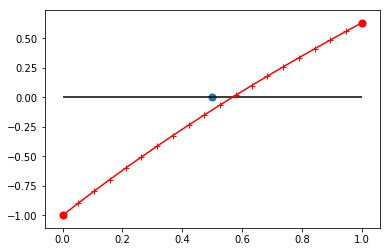

In [60]:
x=np.linspace(0,1,20)
plt.plot(x,f(x),'r+-')
plt.scatter(xmid,fmid,s=50)
plt.hlines(0,x.min(),x.max())

plt.scatter(xl,f(xl),s=50,c='r')
plt.scatter(xu,f(xu),s=50,c='r')

0.5


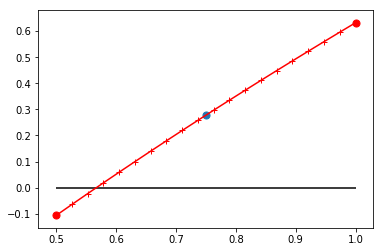

0.25


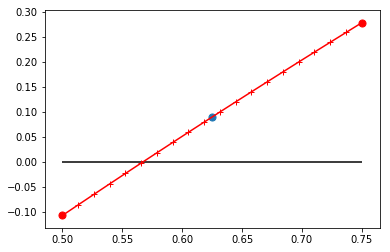

0.125


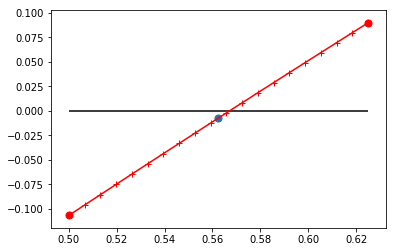

0.0625


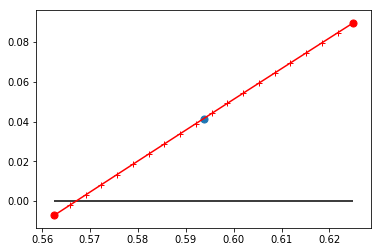

0.03125


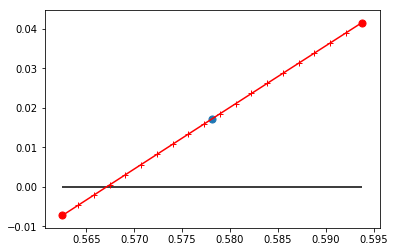

0.015625


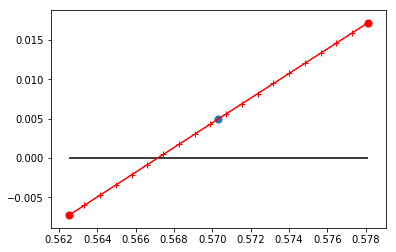

0.0078125


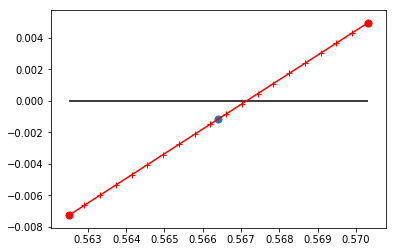

0.00390625


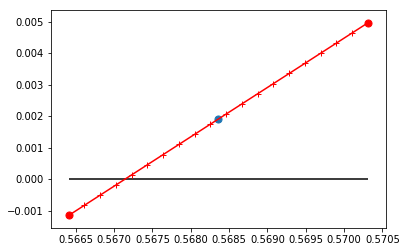

0.001953125


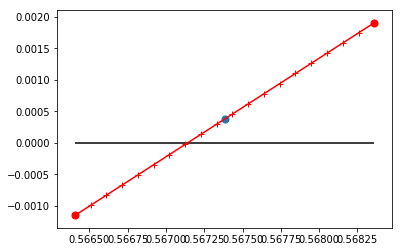

0.0009765625


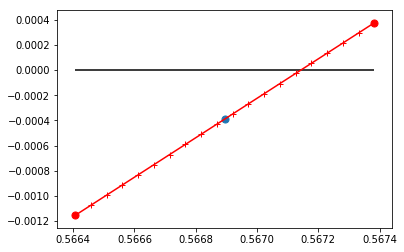

In [69]:
xl=0
xu=1
xmid=0.5*(xl+xu)
fmid=f(xmid)

for i in range(10):
    if (fmid*f(xl)>0):
        xl=xmid
        xu=xu
    else:
        xl=xl
        xu=xmid
    xmid=0.5*(xl+xu)
    fmid=f(xmid)
    error=xu-xl
    print(error)
    x=np.linspace(xl,xu,20)
    plt.plot(x,f(x),'r+-')
    plt.scatter(xmid,fmid,s=50)
    plt.hlines(0,x.min(),x.max())

    plt.scatter(xl,f(xl),s=50,c='r')
    plt.scatter(xu,f(xu),s=50,c='r')
    plt.pause(0.05)
        

In [39]:
error



0.0009765625

In [1]:
def f(x) :
    return(x-np.exp(-x))

def find_zero_func(func,x1,x2,epsilon):
    precision=np.absolute(x2-x1)
    if (np.sign(f(x2)) != np.sign(f(x1))) :
            print( "The zero is in between {} and {}" .format(x1,x2) )
            while (precision>epsilon) :
                x3= (x1+x2)/2.
                if np.sign(f(x1)) != np.sign(f(x3)) :
                    print( "The zero is in between {} and {}" .format(x1,x3) )
                    x2=x3
                    precision=abs(x2-x1)
                else :
                    print( "The zero is in between {} and {}" .format(x2,x3) )
                    x1=x3
                    precision=abs(x2-x1)

    else :
        print( "NO zero in between {} and {}" .format(x1,x2) );

    return 0.5*(x1+x2)


In [2]:
x1=0.
x2=2.
epsilon=0.01
print(f(find_zero_func(f,x1,x2,epsilon)))


NameError: name 'np' is not defined

In [ ]:
%matplotlib inline
from matplotlib import pylab as plt
plt.figure(figsize=(6,6))
x=np.linspace(x1,x2,100)
plt.plot(x,f(x),'k-')
plt.axhline(0)
plt.plot(find_zero_func(f,x1,x2,epsilon),f(find_zero_func(f,x1,x2,epsilon)),'r*')


## 6. vsort

In [ ]:
def swap(A,m,n):
    tmp=A[n]
    A[n]=A[m]
    A[m]=tmp
    return A

#% Consider ONCE the full vector of n elements
def vsort(V):
    Vsort=np.copy(V)
    for n1 in range(np.size(V)-1,0,-1) :
        #print(n1)
        for n2 in range(n1):
            if (Vsort[n2]>Vsort[n2+1]) :
                Vsort=swap(Vsort,n2,n2+1)
    return Vsort


#%% Improvment
def vsort_improved(V):
    Vsort=np.copy(V)
    n1=np.size(Vsort)-1
    lswap=True
    while (lswap):
        lswap=False
        for n2 in range(n1):
            if Vsort[n2]>Vsort[n2+1] :
                Vsort=swap(Vsort,n2,n2+1)
                lswap=True
        n2=n2-1
    return Vsort
              

In [ ]:
V = np.random.randint(-50,50,100);
print(V)
print(vsort(V))
print(vsort_improved(V))

## Tutorial - trajectory of a particle

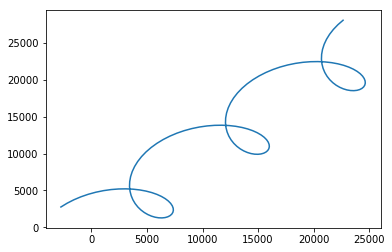

In [57]:
u0=0.2
v0=0.2
um=0.1
vm=0.1
lamda=30*np.pi/180
f=4*np.pi/86400*np.sin(30*np.pi/180)
t=np.arange(0,3*86400,30*60)

x=u0/f*np.sin(f*t)-v0/f*np.cos(f*t)+um*t
y=v0/f*np.sin(f*t)+u0/f*np.cos(f*t)+vm*t

plt.plot(x,y)